<a href="https://colab.research.google.com/github/prititaliya/Polynomial-Regression/blob/main/Polynomial-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np


In [13]:
df=pd.read_csv('/manufacturing.csv')

In [15]:
df.sample(5)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
315,149.073442,15.702961,2340.894441,26094.974064,3.312596e+06,100.000000
2455,185.314280,18.035527,3342.240690,40207.982745,6.363623e+06,100.000000
451,298.402249,5.314127,1585.747438,89193.972675,2.657087e+07,20.802143
2071,203.686462,16.898761,3442.048762,46313.921933,8.450294e+06,99.999991
1716,151.052903,16.548573,2499.709924,27348.893121,3.446297e+06,100.000000


In [18]:
from ydata_profiling import ProfileReport

In [19]:
profile_report=ProfileReport(df)

In [21]:
profile_report.to_file('/output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

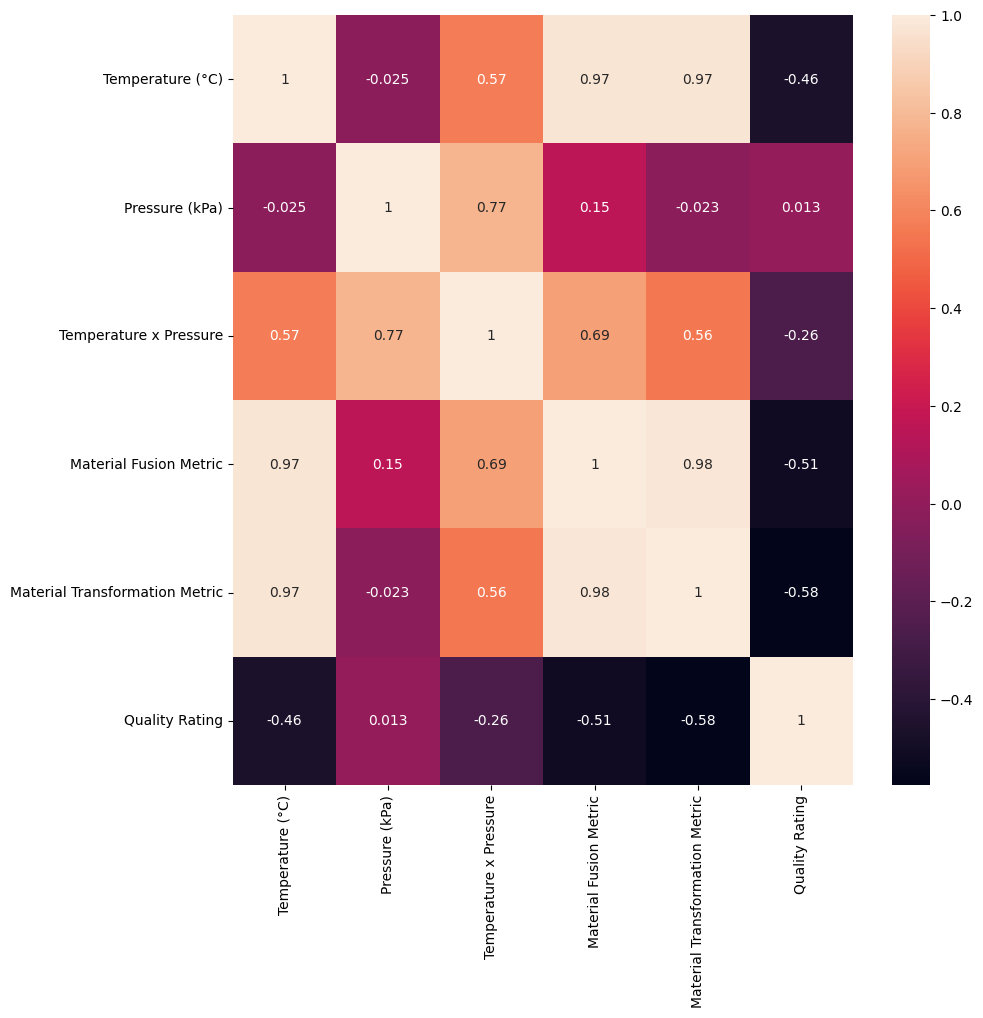

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

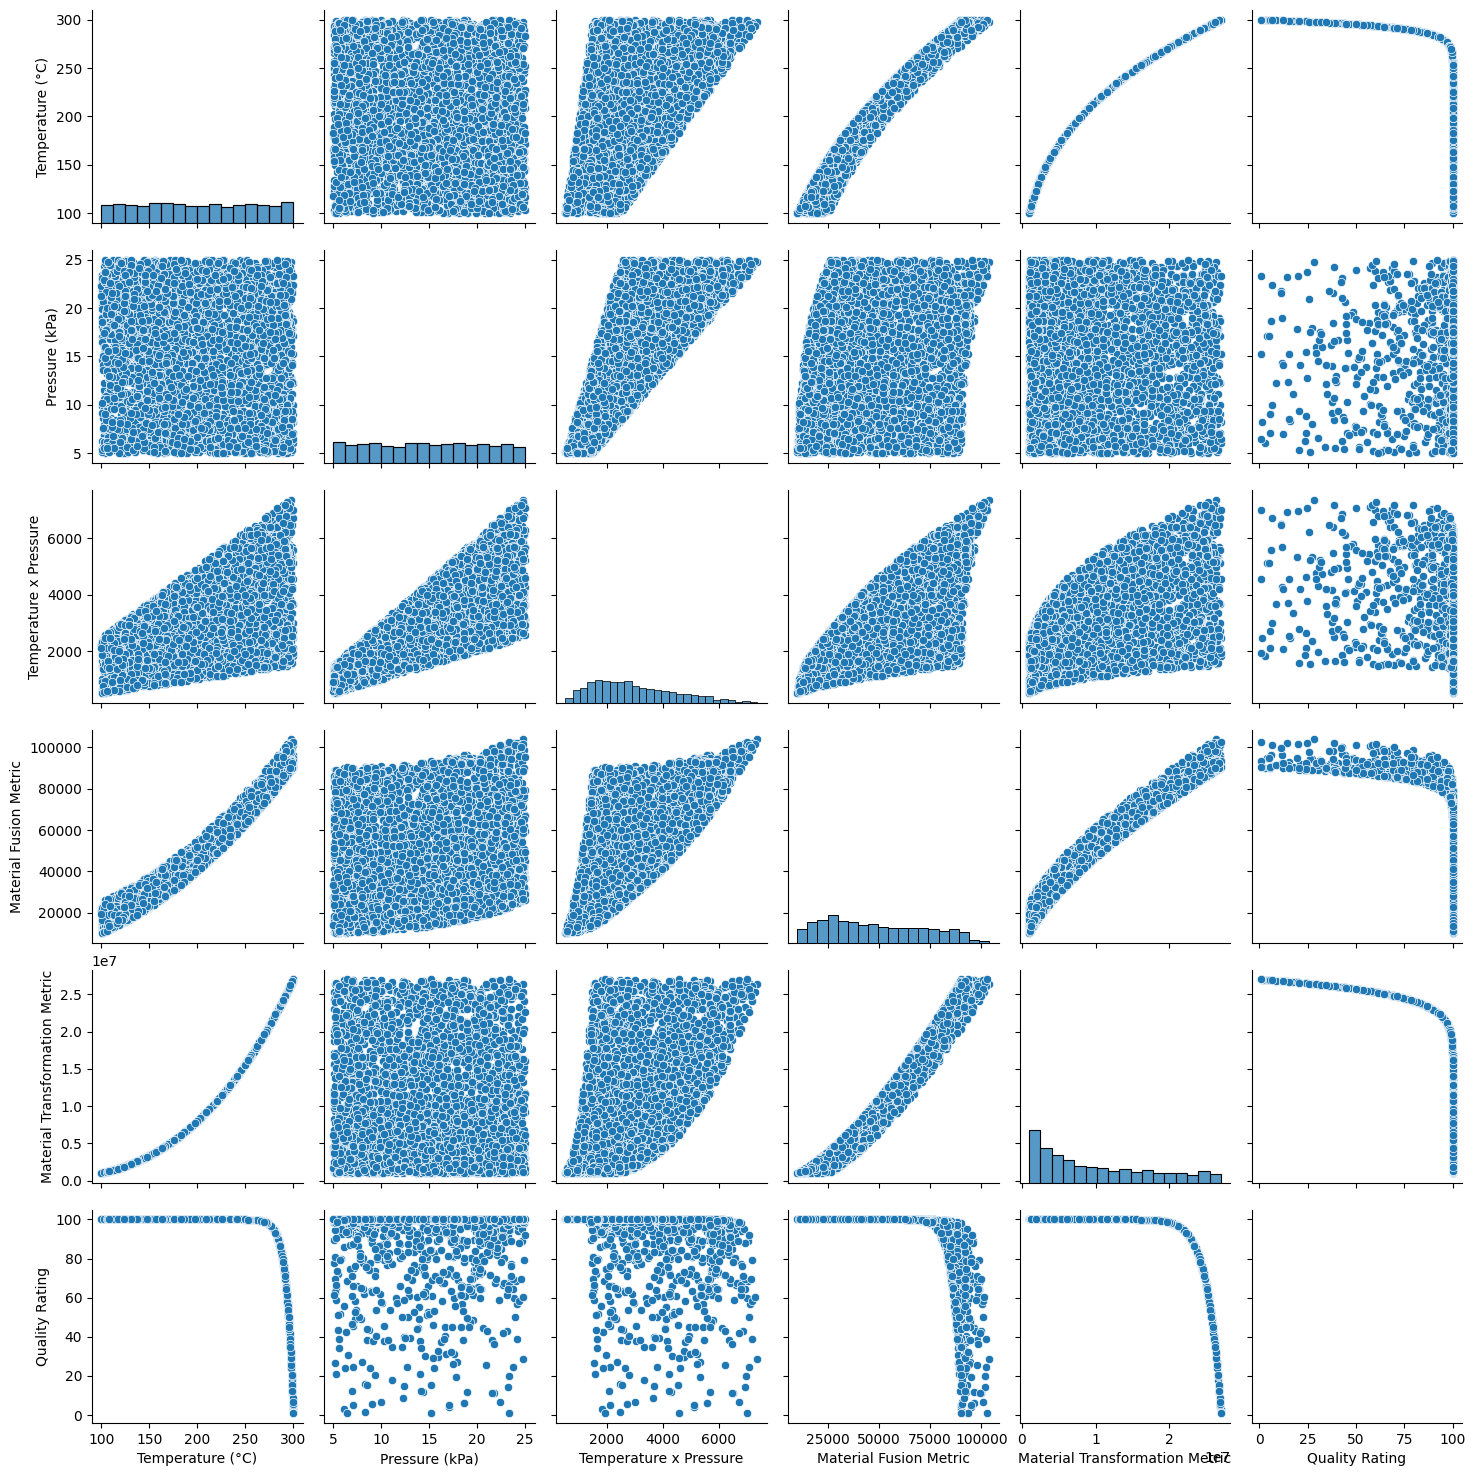

In [24]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [30]:
newdf=df.drop(columns=['Pressure (kPa)',"Temperature x Pressure"])

<Figure size 1000x1000 with 0 Axes>

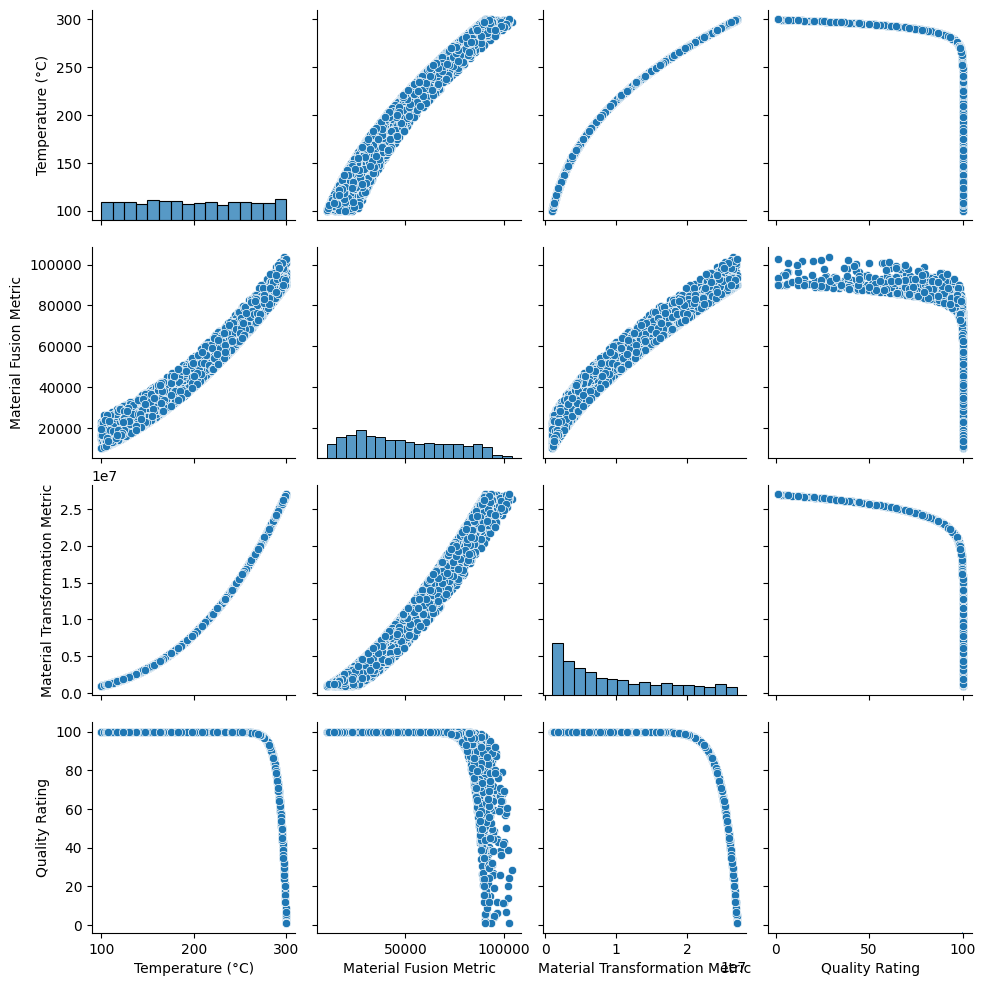

In [32]:
plt.figure(figsize=(10,10))
sns.pairplot(newdf)
plt.show()

In [62]:
x=newdf.drop(columns=["Quality Rating"])
y=df["Quality Rating"]

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [46]:
newdf.columns

Index(['Temperature (°C)', 'Material Fusion Metric',
       'Material Transformation Metric', 'Quality Rating'],
      dtype='object')

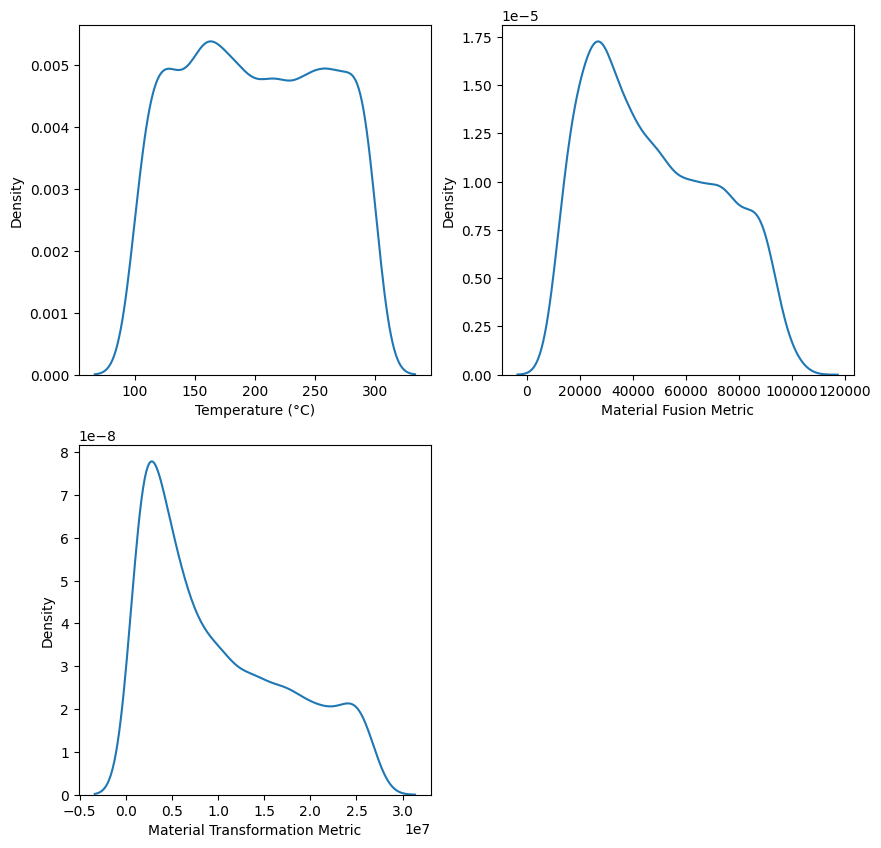

In [57]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data=newdf,x="Temperature (°C)")
plt.subplot(2,2,2)
sns.kdeplot(data=newdf,x="Material Fusion Metric")
plt.subplot(2,2,3)
sns.kdeplot(data=newdf,x="Material Transformation Metric")
plt.show()

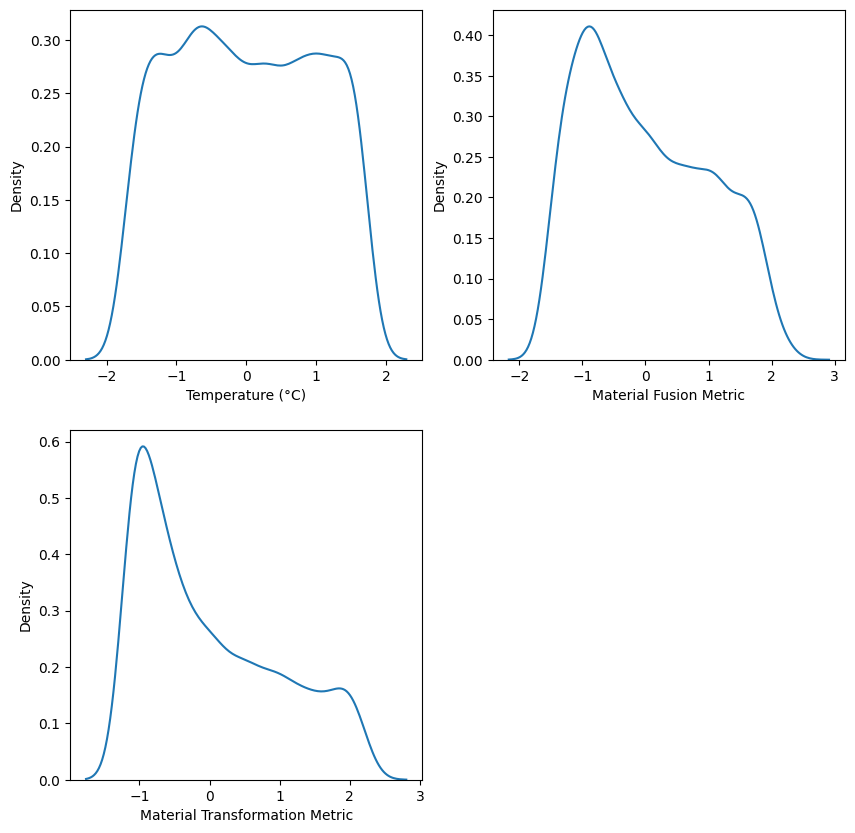

In [67]:
standardScaler=StandardScaler()
x_scaled=standardScaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data=x_scaled['Temperature (°C)'])
plt.subplot(2,2,2)
sns.kdeplot(data=x_scaled['Material Fusion Metric'])
plt.subplot(2,2,3)
sns.kdeplot(data=x_scaled['Material Transformation Metric'])
plt.show()

In [74]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [77]:
polynomial_features=PolynomialFeatures(degree=2)
x_train_poly=polynomial_features.fit_transform(X_train)
x_test_poly=polynomial_features.transform(X_test)

In [78]:
linear_model=LinearRegression()
linear_model.fit(x_train_poly,y_train)

LinearRegression()

In [80]:
r2=r2_score(y_test,linear_model.predict(x_test_poly))
mae=mean_absolute_error(y_test,linear_model.predict(x_test_poly))

In [82]:
print("R2 Score:",r2)
print("MAE:",mae)

R2 Score: 0.9275375950049981
MAE: 2.496761746291313


In [96]:
preds=linear_model.predict(x_test_poly)

In [97]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': preds})

In [100]:
df_comparison.sample(10)

,Actual,Predicted
305,100.000000,101.201705
3098,100.000000,100.750826
969,97.088029,96.129901
1034,99.983472,101.909230
3748,86.568601,78.744958
134,99.999932,97.304236
152,100.000000,98.958571
2383,100.000000,101.179784
2029,100.000000,101.271522
1422,100.000000,97.986071
